In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


In [2]:
bankclient_data=pd.read_csv('bank-full.csv',sep=';')
bankclient_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bankclient_data.shape

(45211, 17)

In [4]:
bankclient_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bankclient_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bankclient_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bankclient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()
bankclient_data['job']=le_encoder.fit_transform(bankclient_data['job'])
bankclient_data['marital']=le_encoder.fit_transform(bankclient_data['marital'])
bankclient_data['education']=le_encoder.fit_transform(bankclient_data['education'])
bankclient_data['default']=le_encoder.fit_transform(bankclient_data['default'])
bankclient_data['housing']=le_encoder.fit_transform(bankclient_data['housing'])
bankclient_data['loan']=le_encoder.fit_transform(bankclient_data['loan'])
bankclient_data['contact']=le_encoder.fit_transform(bankclient_data['contact'])
bankclient_data['month']=le_encoder.fit_transform(bankclient_data['month'])
bankclient_data['poutcome']=le_encoder.fit_transform(bankclient_data['poutcome'])
bankclient_data['y']=le_encoder.fit_transform(bankclient_data['y'])
bankclient_data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


### Model Building

In [12]:
x=bankclient_data.drop('y',axis=1)
y=bankclient_data[['y']]

In [13]:
x.shape,y.shape

((45211, 16), (45211, 1))

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [15]:
x_train.shape,y_train.shape

((36168, 16), (36168, 1))

In [16]:
x_test.shape,y_test.shape

((9043, 16), (9043, 1))

### Model Training


In [17]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression() #Model Initialisation/Estimator
logistic_model.fit(x_train,y_train)

LogisticRegression()

### Model Testing | Model Evaluation

In [19]:
y_train_pred=logistic_model.predict(x_train)
y_test_pred=logistic_model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy Score :',accuracy_score(y_train,y_train_pred))
print('---------------------------------------------')
print('Confusion Matrix :\n',confusion_matrix(y_train,y_train_pred))
print('---------------------------------------------')
print(classification_report(y_train,y_train_pred))

Accuracy Score : 0.8867230701172307
---------------------------------------------
Confusion Matrix :
 [[31407   522]
 [ 3575   664]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.16      0.24      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.57      0.59     36168
weighted avg       0.86      0.89      0.86     36168



In [31]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds= roc_curve(y,logistic_model.predict_proba (x)[:,1])

auc= roc_auc_score(y_train,y_train_pred)
print('Area Under the Curve[AUC]:',auc)

Area Under the Curve[AUC]: 0.5701459716541547


Text(0, 0.5, 'True Positive Rate')

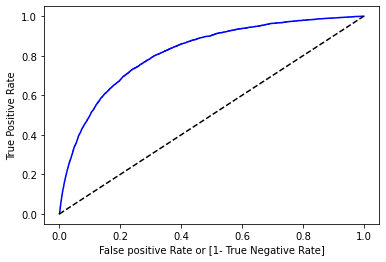

In [34]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='blue',label='ogistic_model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')